In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [231]:
df=pd.read_csv("C://Users//shrad//OneDrive//Desktop//Python Practice jupyter notebook//UNZIP_FOR_NOTEBOOKS_FINAL//08-Linear-Regression-Models//Advertising.csv")

In [30]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [32]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
df['total spent']=df['TV']+df['radio']+df['newspaper']

In [34]:
df.head()

,TV,radio,newspaper,sales,total spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total spent', ylabel='sales'>

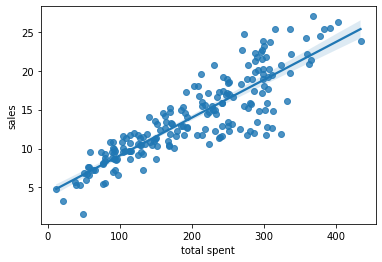

In [38]:
#to get a relationship between total spent on advertising on sale
sns.scatterplot(data=df,x='total spent',y='sales')

<AxesSubplot:xlabel='total spent', ylabel='sales'>

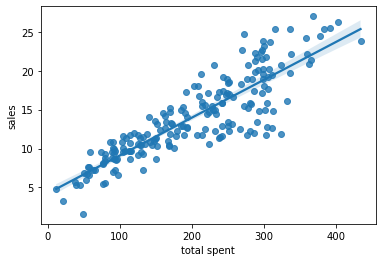

In [41]:
#to show the line of best fit on top use sns.regplot

sns.regplot(data=df,x='total spent',y='sales')

In [44]:
#y=mx+c #to get the best fit coefficients
np.polyfit(df['total spent'],df['sales'],deg=1)
#B1=0.04868788 B0=4.24302822

array([0.04868788, 4.24302822])

In [46]:
potential_spend=np.arange(0,500,100)

In [47]:
predicted_sales=0.04868788*potential_spend+4.24302822

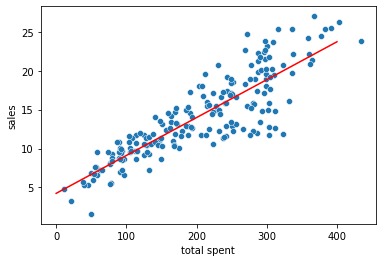

In [50]:
sns.scatterplot(data=df,x='total spent',y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

In [51]:
#fitting polynomial line with deg 2
np.polyfit(df['total spent'],df['sales'],deg=2)
# y= B2*x**2+B1*X+B0


array([8.21901022e-06, 4.53486875e-02, 4.51143622e+00])

In [58]:
potential_spend=np.arange(0,500,100)
predicted_sales=8.21901022e-06*potential_spend**2+4.53486875e-02*potential_spend+4.51143622

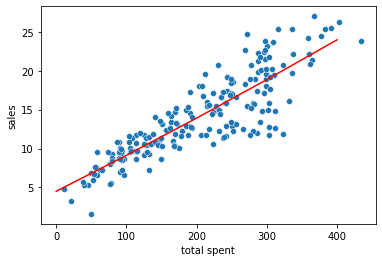

In [59]:
sns.scatterplot(data=df,x='total spent',y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

In [60]:
#for simple linear regression, we can use numpy however for complex regression we hae to us Scikit-Learn library
#scikit-learn is a library containing many machine learning alorithms
#it utilizes a generalized 'Estimator API' framework to calling the models
#this means the way algorithms are imported, fitted and used is uniform across all algorithms
#This means we can easily swap various approaches in models



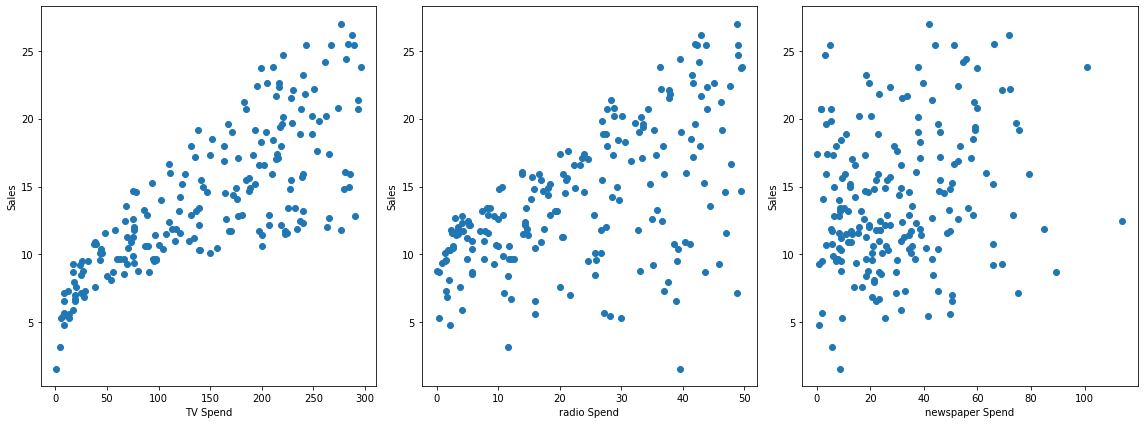

In [66]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('newspaper Spend')

plt.tight_layout()

In [ ]:
#TV and radio spend results higher sales however newspaper spend is not really related with sale

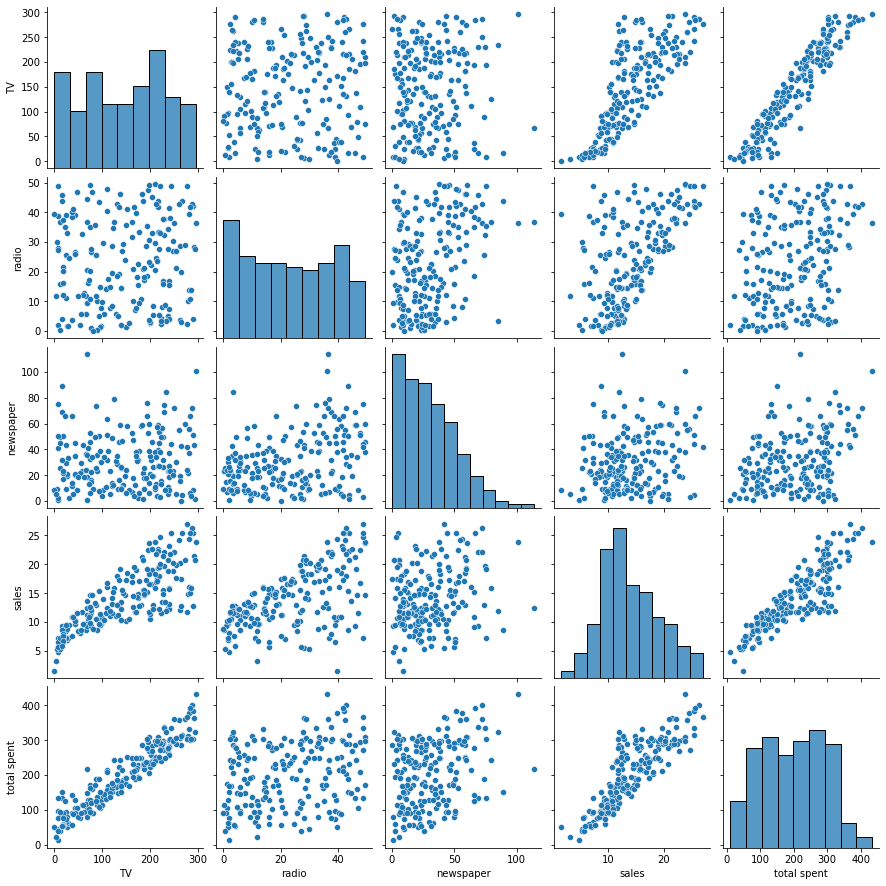

In [67]:
sns.pairplot(df)

In [70]:
X=df.drop(['sales','total spent'],axis=1)
df=df.drop('total spent',axis=1)


KeyError: "['total spent'] not found in axis"

In [71]:
y=df['sales']

In [156]:
#to split the data into train and test
from sklearn.model_selection import train_test_split

In [358]:
#help(train_test_split)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #test_size=33% of data
#random_state=setting a random seed in numpy to get same results everywhere for same seed. 



In [75]:
len(df)

200

In [76]:
len(X_train)

140

In [77]:
len(y_train)

140

In [78]:
len(X_test)

60

In [157]:
from sklearn.linear_model import LinearRegression

In [81]:
#help(LinearRegression)

In [82]:
model1=LinearRegression()

In [85]:
model1.fit(X_train,y_train)

LinearRegression()

In [87]:
predictions=model1.predict(X_test)

In [158]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [90]:
MAE=mean_absolute_error(y_test,predictions)


In [91]:
MAE

1.2137457736144805

In [93]:
MSE=mean_squared_error(y_test,predictions)
MSE

2.298716697886378

In [94]:
np.sqrt(MSE)
#

1.5161519375993877

In [ ]:
#One of the assumptions for estimating coefficients is the residual follows the std normal distribution with mean zero and variance 1
#hence, the residual distribution should look like a bell-shaped curve
#Residual plot shows residual error vs true y-value
#there shouldnt be any trend in the residual plot, a funnel shaped residual plot indicated high variance in y- values


In [95]:
residuals=y_test-predictions

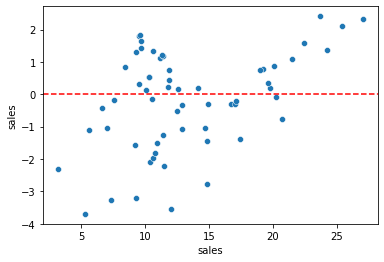

In [100]:
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0,color='r',ls='--') #to draw a horizontal line 

#no clear line or curve

C:\Users\shrad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

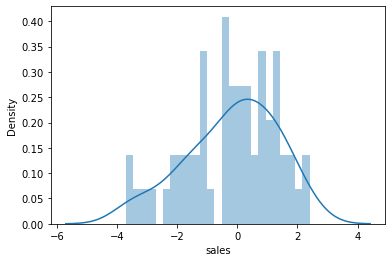

In [104]:
sns.distplot(residuals,kde=True,bins=25)

In [105]:
#model deployment and coefficient interpretation

final_model=LinearRegression()

In [106]:
final_model.fit(X,y)

LinearRegression()

In [107]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
#for newspaper, the coeff -0.00103749 is nearly zero. 
# hence newspaper is not really related to sales

In [109]:
y_predicted=final_model.predict(X)

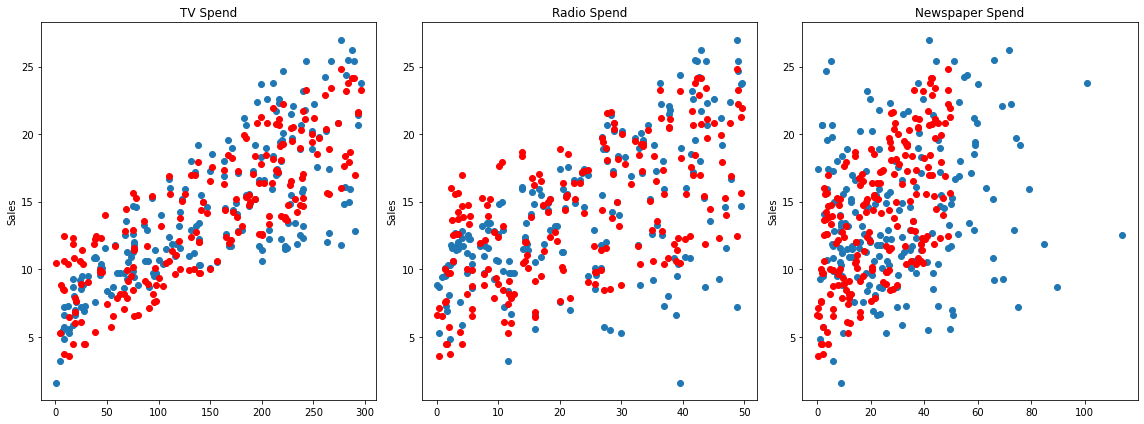

In [113]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_predicted,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_predicted,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_predicted,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [159]:
from joblib import dump,load #save the model and load it again


In [115]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [117]:
loaded_model=load('final_sales_model.joblib') #if someone else wants to use the model, they can load it

In [118]:
loaded_model.coef_ #the coeff are same

array([ 0.04576465,  0.18853002, -0.00103749])

In [119]:
X.shape

(200, 3)

In [120]:
#149 TV, 22 radio 12 newspaper
#predict sales from the above
campaign=[[149,22,12]] #the shape of original feature must be matched with the data on which the model is being used

In [121]:
 loaded_model.predict(campaign)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [122]:
#Polynomial Regression
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [124]:
X=df.drop('sales',axis=1)

In [128]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [160]:
#feature convertor 
from sklearn.preprocessing import PolynomialFeatures

In [127]:
polynomial_convertor=PolynomialFeatures(degree=2, include_bias=False) #add in array column of values 

In [129]:
polynomial_convertor.fit(X)

PolynomialFeatures(include_bias=False)

In [133]:
poly_feature=polynomial_convertor.transform(X)

In [136]:
poly_feature.shape

(200, 9)

In [132]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [139]:
poly_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [161]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=42)

In [143]:
from sklearn.linear_model from LinearRegression

140

In [144]:
poly_model=LinearRegression()

In [145]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [146]:
poly_predictions=poly_model.predict(X_test)

In [148]:
from sklearn.metrics import mean_squared_error

In [149]:
MSE= mean_squared_error(y_test,poly_predictions)

In [150]:
MSE

0.5231944949055402

In [151]:
residuals=y_test-poly_predictions

In [153]:
poly_model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [ ]:
# for polynomial regression to know the best polynomial degree according to the bias variance trade off
# create the different order poly
# fit on train 
# store RMSE values for both train and test
# plot the results (error vs poly order)


In [171]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    poly_convertor=PolynomialFeatures(degree=d,include_bias=False)
    poly_feature=poly_convertor.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=42)
    
    model=LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
#to predict train and test Y 
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
 # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
# Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

# Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [185]:
len(np.arange(1,10))
len(train_rmse_errors)

9

In [186]:
len(np.arange(1,10))

9

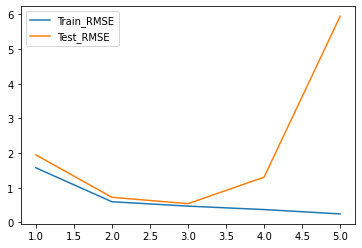

In [192]:

plt.plot(np.arange(1,6),train_rmse_errors[:5],label='Train_RMSE' )
plt.plot(np.arange(1,6),test_rmse_errors[:5],label='Test_RMSE' )
plt.legend()

In [219]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [220]:
poly_model=LinearRegression()

In [222]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [223]:
from joblib import dump, load

In [224]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [225]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [226]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [227]:
campaign = [[149,22,12]]

In [228]:
campaign_poly = loaded_poly.transform(campaign)
campaign_poly

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.490000e+02, 2.200000e+01, 1.220000e+02, 2.220100e+04,
        3.278000e+03, 1.817800e+04, 4.840000e+02, 2.684000e+03,
        1.488400e+04, 3.307949e+06, 4.884220e+05, 2.708522e+06,
        7.211600e+04, 3.999160e+05, 2.217716e+06, 1.064800e+04,
        5.904800e+04, 3.274480e+05, 1.815848e+06]])

In [212]:
final_featureconvertor=dump(poly_convertor,'Convertor.joblib')

In [213]:
loaded_convertor=load('Convertor.joblib')

In [214]:
final_polyModel

['final_polyModel.joblib']

In [215]:
#to get access
loaded_model=load('final_polyModel.joblib')

In [216]:
campaign=[[149,22,122]]

In [230]:
#to get transformed feature
transformed_data=loaded_convertor.transform(campaign)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [229]:
final_model.predict(campaign_poly)

array([13.21952992])

In [ ]:
# Regularization
# Three main types of regularization
# l1 - lasso regression
#l2- Ridge regression
#combining l1 and l2 - elastic net

#feature scaling
#standardization: mean zero and variance one
#normalization: scales all the values between 0 and 1
#scikit learn provides fit and transform to perform feature scaling

# .fit() method call simply calculates the necessary statistics (Xmin, Xmax, mean, std deviation)
# .transform() method call actually scales data and returns the new scaled version of data

# a very important consideration for fit and transform
# we only fit to training data
#calculating statistical information should only come from training data 

#Using the full data set would cause data leakage
#calculating statistics from full data leads to some information of the test set leaking into the training process upon transform() conversion

#do we need to scale the response? Not necessary also it can negatively impact stochastic gradient descent


In [232]:
X=df.drop('sales',axis=1)
Y=df['sales']

In [241]:
from sklearn.preprocessing import PolynomialFeatures

In [242]:
poly_convertor=PolynomialFeatures(degree=2,include_bias=False)

In [243]:
poly_feature=poly_convertor.fit_transform(X)

In [244]:
poly_feature.shape

(200, 9)

In [246]:
from sklearn.model_selection import train_test_split

In [248]:
 X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=42)

In [249]:
from sklearn.preprocessing import StandardScaler

In [250]:
scaler=StandardScaler()

In [ ]:
#do standardscaling on X_train 

In [251]:
scaler.fit(X_train)

StandardScaler()

In [252]:
scaled_xtrain=scaler.transform(X_train)

In [253]:
scaled_xtest=scaler.transform(X_test)

In [258]:
scaled_xtrain[0]

array([ 1.53003874, -0.8862929 , -1.16598019,  1.93705409, -0.22476356,
       -0.62651363, -0.90793157, -0.850692  , -0.81317305])

In [262]:
#Ridge regresion method
from sklearn.linear_model import Ridge

In [264]:
#help(Ridge)

In [267]:
Ridge_model=Ridge(alpha=10)

In [268]:
Ridge_model.fit(scaled_xtrain,y_train)

Ridge(alpha=10)

In [269]:
predicted=Ridge_model.predict(scaled_xtest)

In [272]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [273]:
rmse=np.sqrt(mean_squared_error(y_test,predicted))

In [274]:
rmse

1.0342971166091743

In [280]:
from sklearn.linear_model import RidgeCV  #cross validation for variety of alpha values


In [282]:
#help(RidgeCV)

In [298]:
RidgeCV_model=RidgeCV(alphas=(0.1, 1.0, 10.0))

In [299]:
RidgeCV_model.fit(scaled_xtrain,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [304]:
predicted=RidgeCV_model.predict(scaled_xtest)

In [305]:
rmse=np.sqrt(mean_squared_error(y_test,predicted))

In [306]:
rmse

0.7159217915810188

In [301]:
RidgeCV_model.alpha_

0.1

In [302]:
from sklearn.metrics import SCORERS

In [303]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [330]:
#Lasso Regularization
from sklearn.linear_model import LassoCV

In [331]:
#help(LassoCV)

In [332]:
Lasso_model=LassoCV(eps=0.001,n_alphas=100,cv=5,max_iter=100000000) #smaller eps wider the search for optimized alpha

In [333]:
Lasso_model.fit(scaled_xtrain,y_train)

LassoCV(cv=5, max_iter=100000000)

In [334]:
predicted=Lasso_model.predict(scaled_xtest)

In [335]:
rmse=np.sqrt(mean_squared_error(y_test,predicted))

In [336]:
rmse

0.6900986878105825

In [337]:
#to check the alpha value
Lasso_model.alpha_

0.0049245318064748715

In [338]:
Lasso_model.coef_

array([ 4.3895311 ,  0.23335593,  0.19138635, -2.66289924,  3.55821232,
       -0.42504793,  0.18174448,  0.17674769,  0.10644113])

In [339]:
Ridge_model.coef_

array([ 2.08187241,  0.64602581,  0.01404022, -0.24228323,  2.70757796,
        0.20338707,  0.32854627,  0.18371122, -0.18521417])

In [340]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [341]:
lasso_cv_model.fit(scaled_xtrain,y_train)

LassoCV(cv=5, eps=0.1)

In [342]:
lasso_cv_model.alpha_

0.4924531806474871

In [352]:
test_predictions = lasso_cv_model.predict(scaled_xtest)

In [353]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [354]:
MAE


0.6811464396994009

In [355]:
RMSE

1.0349160163599407

In [356]:
# Training Set Performance
# Training Set Performance
train_predictions = lasso_cv_model.predict(scaled_xtrain)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.6860952368955016

In [357]:
lasso_cv_model.coef_

array([0.97673996, 0.        , 0.        , 0.        , 3.81489857,
       0.        , 0.        , 0.        , 0.        ])